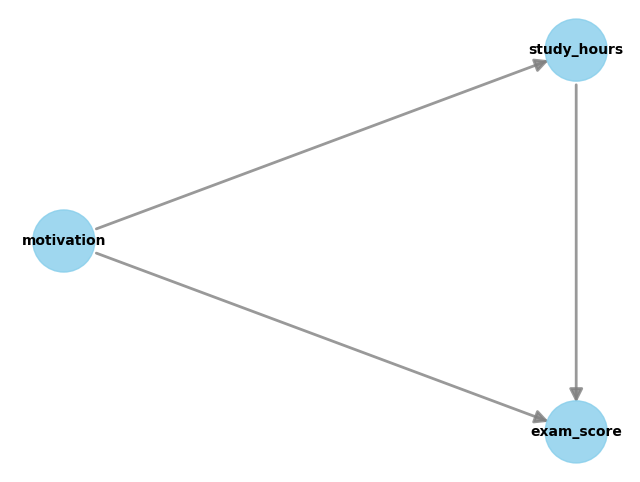

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                
─────────────(E[exam_score|motivation])
d[studyₕₒᵤᵣₛ]                          
Estimand assumption 1, Unconfoundedness: If U→{study_hours} and U→exam_score then P(exam_score|study_hours,motivation,U) = P(exam_score|study_hours,motivation)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Estimate: 3.0109029113194383
Refute: Add a random common cause
Estimated effect:3.0109029113194383
New effect:3.010898860192468
p value:0.92



In [1]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame({
    "study_hours": np.random.normal(5, 2, 1000),  # Hours spent studying
    "motivation": np.random.normal(3, 1, 1000),   # Motivation level (confounder)
    "exam_score": np.nan                          # Exam score
})

# Simulate a causal relationship: Exam score depends on study_hours and motivation
data["exam_score"] = 3 * data["study_hours"] + 2 * data["motivation"] + np.random.normal(0, 1, 1000)

# Causal inference model
model = CausalModel(
    data=data,
    treatment="study_hours",
    outcome="exam_score",
    common_causes=["motivation"]
)

# Display the causal graph
model.view_model()

# Identify causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

# Estimate causal effect
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Causal Estimate:", estimate.value)

# Refute the estimate to check robustness
refutation = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(refutation)